## НИУ ВШЭ НН. Факультет ИМиКН. Методы анализа данных. Charge de cours:  В.А. Калягин.

#### **Домашнее задание №1**: данные, пропуски, выбросы, методы снижения размерности (PCA, MDS, UMAP, …)
#### **Выполнили**: Москвитин Олег, Сятов Никита
#### **Номер варианта**: 1


## Подключение библиотек и загрузка данных

In [1]:
#@title Подключение библиотек

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

from google.colab import files

In [2]:
#@title Загрузка файла с данными

file_path = '25MAG_HW_1_v1.xls'

if not os.path.isfile(file_path):
    uploaded = files.upload()

In [3]:
#@title Метод для считывания данных с xls файла

def load_excel(file_path):
    columns = [
        'Age (years)',
        'Number of dependants',
        'Monthly income (RUB)',
        'Residence period in the region (years)',
        'Car valuation (USD)',
        'Loan amount (x1000 RUB)'
    ]

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No such file or directory: '{file_path}'")

    return pd.read_excel(
        file_path,
        header=None,
        names=columns
    )

In [4]:
#@title Создание DataFrame

df = load_excel(file_path)
df

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,40.0,2.0,NaN,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,9000.0,82000.0
3,NaN,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0
5,35.0,2.0,29400.0,6.0,29000.0,289000.0
6,32.0,2.0,37100.0,5.0,36000.0,365000.0
7,32.0,NaN,27000.0,5.0,26000.0,261000.0
8,36.0,2.0,29000.0,7.0,28000.0,287000.0
9,45.0,3.0,38600.0,12.0,40000.0,397000.0


In [5]:
#@title Общая информация о DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age (years)                             39 non-null     float64
 1   Number of dependants                    39 non-null     float64
 2   Monthly income (RUB)                    39 non-null     float64
 3   Residence period in the region (years)  39 non-null     float64
 4   Car valuation (USD)                     39 non-null     float64
 5   Loan amount (x1000 RUB)                 39 non-null     float64
dtypes: float64(6)
memory usage: 2.1 KB


У каждого признака имеется 3 пропуска.

## Данные. Первичная обработка данных. Первые выводы

> 1. Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.

In [6]:
#@title Основные характеристики признаков: среднее, стандартное отклонение, медиана, 1-ый и 3-ий квартили, min и max

df.describe()

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,38.512821,1.974359,19600.000000,10.487179,20846.153846,205846.153846
std,8.855185,1.038399,9682.077854,4.849698,11868.885598,98675.315119
min,19.000000,0.000000,700.000000,1.000000,0.000000,3000.000000
25%,31.500000,1.000000,15150.000000,6.500000,14500.000000,162000.000000
50%,39.000000,2.000000,20200.000000,11.000000,20000.000000,207000.000000
75%,44.000000,3.000000,26600.000000,13.000000,27000.000000,269000.000000
max,56.000000,4.000000,38600.000000,20.000000,50000.000000,397000.000000


In [7]:
#@title Основные характеристики признаков: мода

df.astype('object').describe()

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
count,39.0,39.0,39.0,39.0,39.0,39.0
unique,25.0,5.0,36.0,18.0,27.0,35.0
top,31.0,2.0,16000.0,10.0,17000.0,25000.0
freq,5.0,13.0,2.0,5.0,4.0,2.0


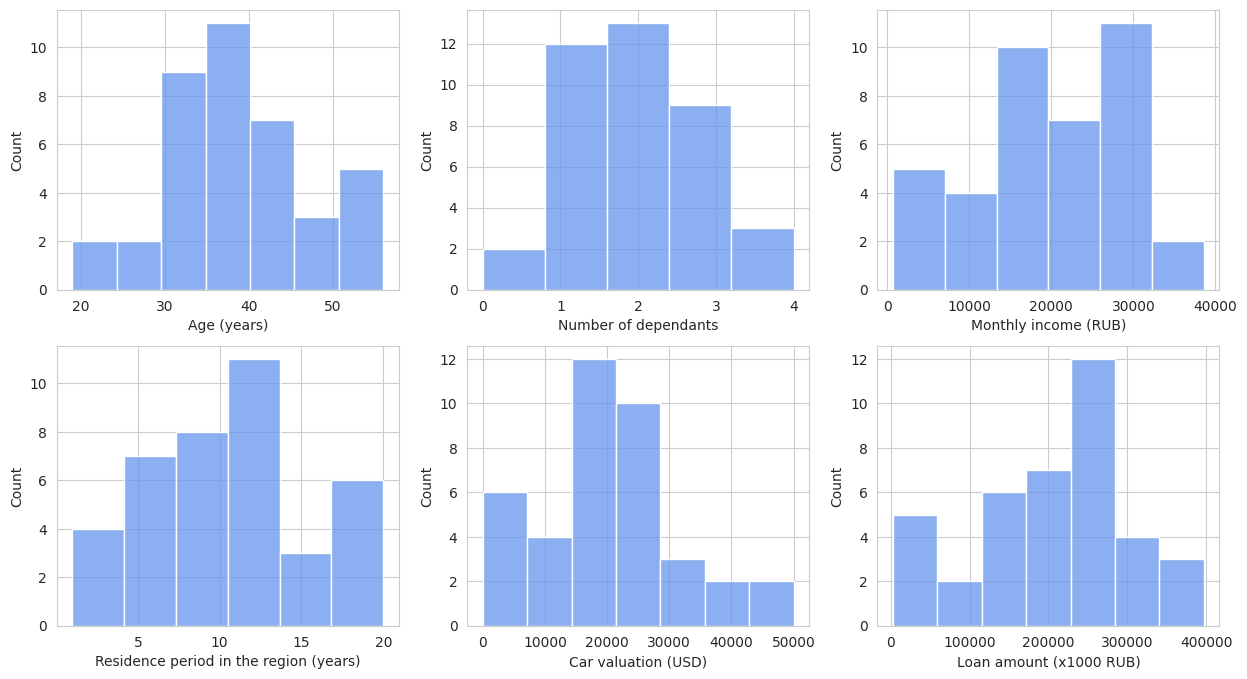

In [8]:
#@title Гистограммы признаков

sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

color = 'cornflowerblue'
binwidth = [5, 0.8, 6000, 3, 7500, 60000]
columns = df.columns.tolist()

for i in range(2):
    for j in range(3):
        sns.histplot(data=df, x=columns[i * 3 + j], binwidth=binwidth[i * 3 + j], color=color, ax=axes[i, j])

plt.show()

> **Выводы:**
>* На основе гистограммы признака "Число иждивенцев" можно предположить, что данный признак имеет биномиальное распределение.
>* Про распределения других признаков ничего однозначного сказать нельзя на основе полученных выше гистограмм.

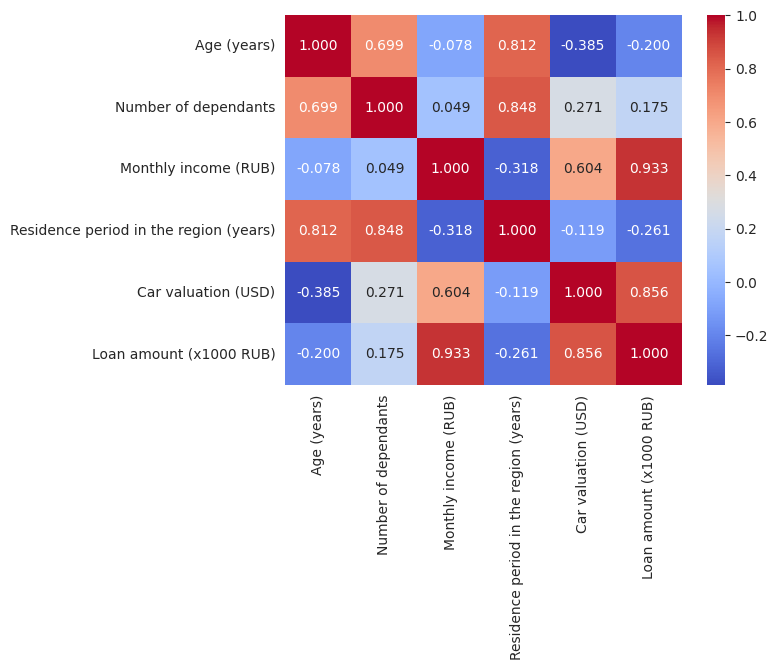

In [9]:
#@title Корреляционная матрица

corr_mat = df.corr()

fig = sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()

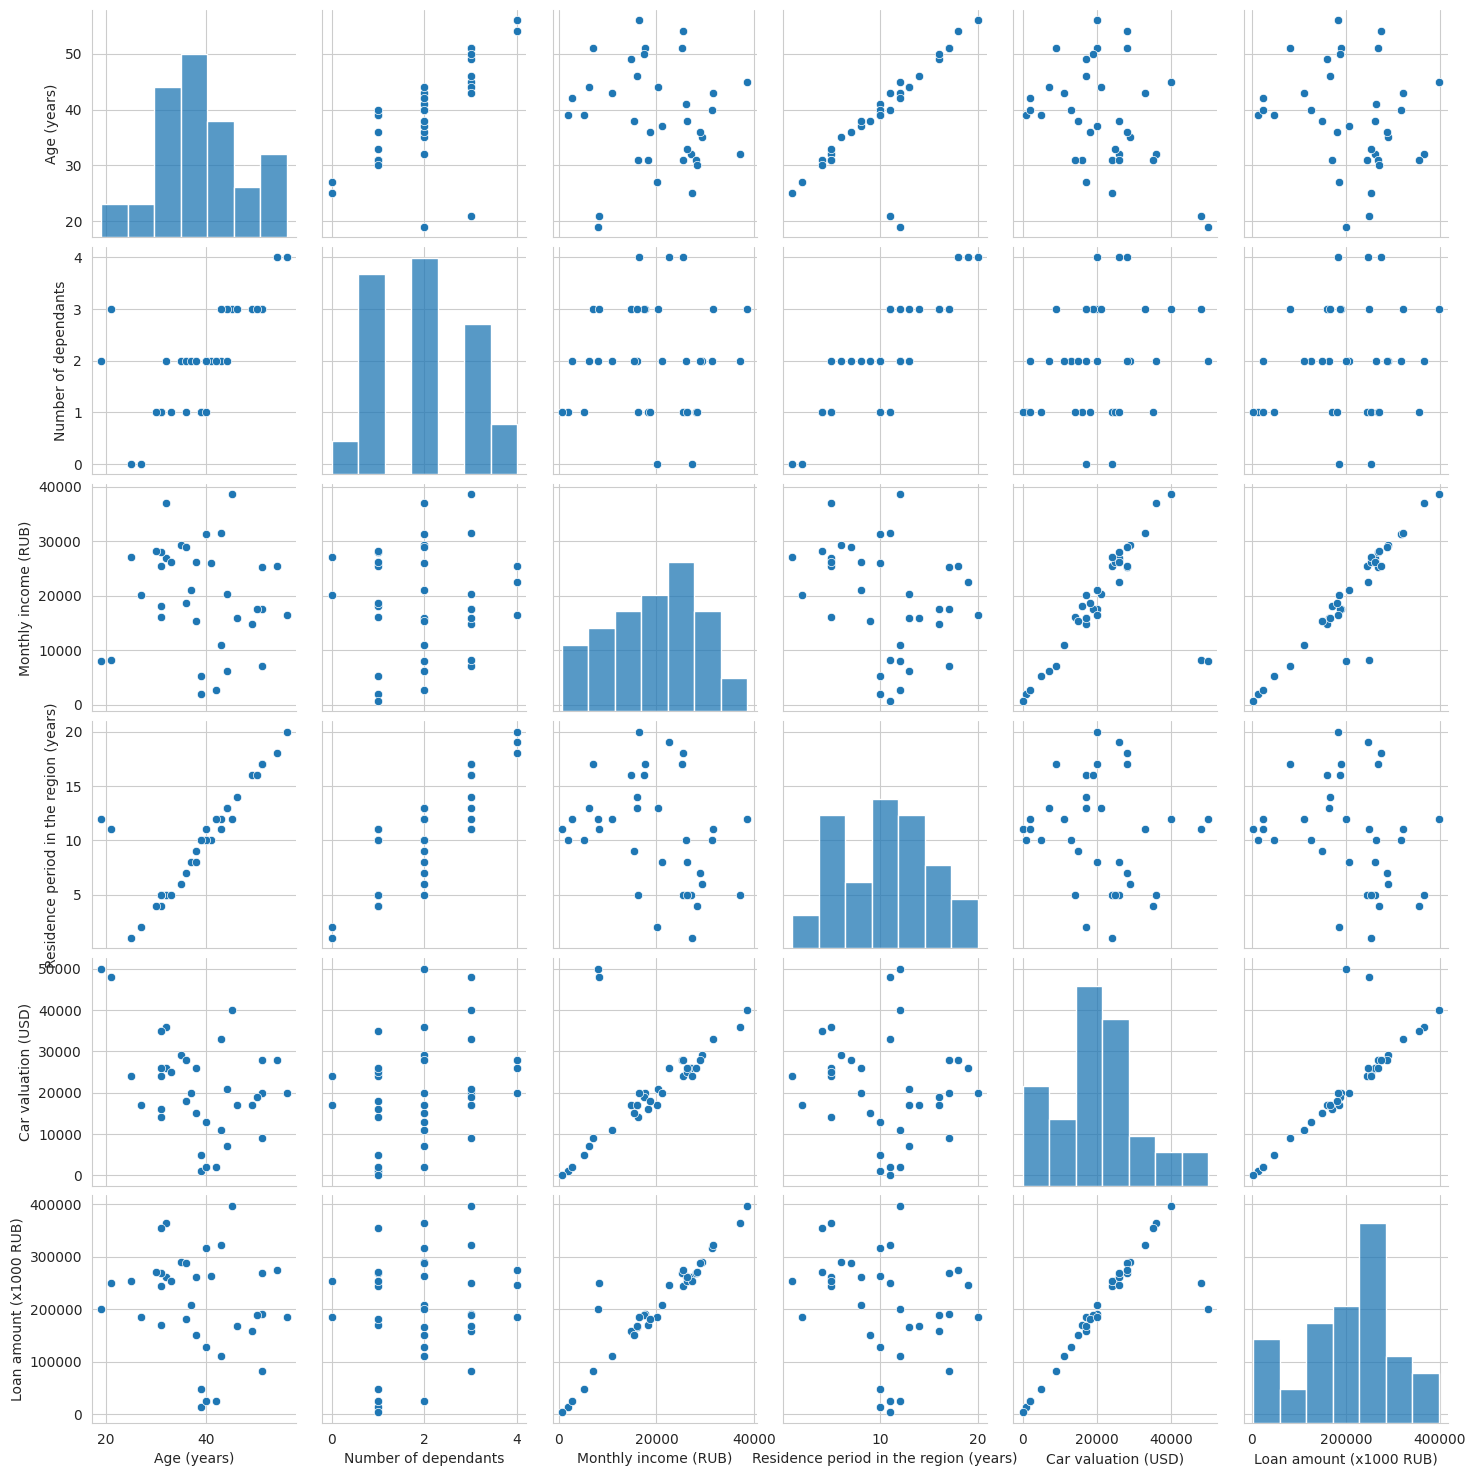

In [10]:
#@title Исследование линейной зависимости

sns.pairplot(df)
plt.show()

> **Выводы:**
>* Признаки "Месячный доход", "Оценка автомобиля" и "Сумма кредита" линейно связаны. Коэффициенты корреляции не близки к 1 из-за наличия выбросов, нарушающих линейную зависимость.
>* Признаки "Возраст" и "Время проживания в регионе" также являются частично линейно зависимыми. Действительно, "Возраст" = "Время проживания в регионе" + "Время проживания в других регионах".
>* Признаки "Возраст" и "Число иждивенцев" также немного коррелируются.


> 2. В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.
3. В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

### Линейная зависимость между признаками "Оценка автомобиля" и "Размер кредита"

Для заполнения **пропусков** в признаках "Оценка автомобиля" и "Размер кредита" будем использовать их линейную зависимость. Однако заметим, что в выборке имеются **выбросы**, из-за которых линейная регрессия будет работать неправильно. Воспользуемся robust алгоритмом построения линейной регрессии: `RANSAC` алгоритм, который разбивает выборку на множества выбросов (outliers) и не выбросов (inliers). Таким образом, мы заполним пропуски при помощи найденной линейной регресии, и избавимся от выбросов.

![](https://miro.medium.com/v2/resize:fit:786/format:webp/1*qRIplvcGRVdj6M8a-enspA.png)

In [11]:
#@title Строим линейную регрессию, устройчивую к выбросам

from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score

cur_df = df[['Car valuation (USD)', 'Loan amount (x1000 RUB)']].dropna()
X, y = cur_df[['Car valuation (USD)']].to_numpy(), cur_df['Loan amount (x1000 RUB)'].to_numpy()

regressor = RANSACRegressor(random_state=42).fit(X, y)
outliers_ids = cur_df.iloc[(~regressor.inlier_mask_).nonzero()[0]].index.tolist()
inliers_ids = regressor.inlier_mask_.nonzero()[0]

print(f'R2 = {r2_score(y[inliers_ids], regressor.predict(X[inliers_ids]))}')
print(f'RANSACRegressor: coef_={regressor.estimator_.coef_}, intercept_={regressor.estimator_.intercept_}')

R2 = 0.9947145986025002
RANSACRegressor: coef_=[9.92898142], intercept_=1288.1031649037031


In [12]:
#@title Вспомогательные методы

def linear_regression_stats(df: pd.DataFrame, feature_x: str, feature_y: str):
    x_mean, y_mean = df[feature_x].mean(), df[feature_y].mean()
    x_std, y_std = df[feature_x].std(), df[feature_y].std()

    r = df[feature_x].corr(df[feature_y])

    # y = a * x + b
    a = r * y_std / x_std
    b = y_mean - a * x_mean

    return (a.item(), b.item(), r.item())

def linear_regression_plot(df: pd.DataFrame, feature_x: str, feature_y: str, outliers_ids: list = None):
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))

    sns.regplot(data=df, x=feature_x, y=feature_y, ax=axes[0])
    r2 = df[feature_x].corr(df[feature_y]).item() ** 2
    axes[0].set_title(f'With outliers\n(R2 = {r2:.3f})')

    new_df = df.drop(outliers_ids, axis=0)
    sns.regplot(data=new_df, x=feature_x, y=feature_y, ax=axes[1])
    a, b, r = linear_regression_stats(new_df, feature_x, feature_y)
    axes[1].set_title(f'Without outliers\n\"Loan amount (x1000 RUB)\" = {a:.3f} * \"Car valuation (USD)\" + {b:.3f} (R2 = {r ** 2:.3f})')

    plt.tight_layout()
    plt.show()

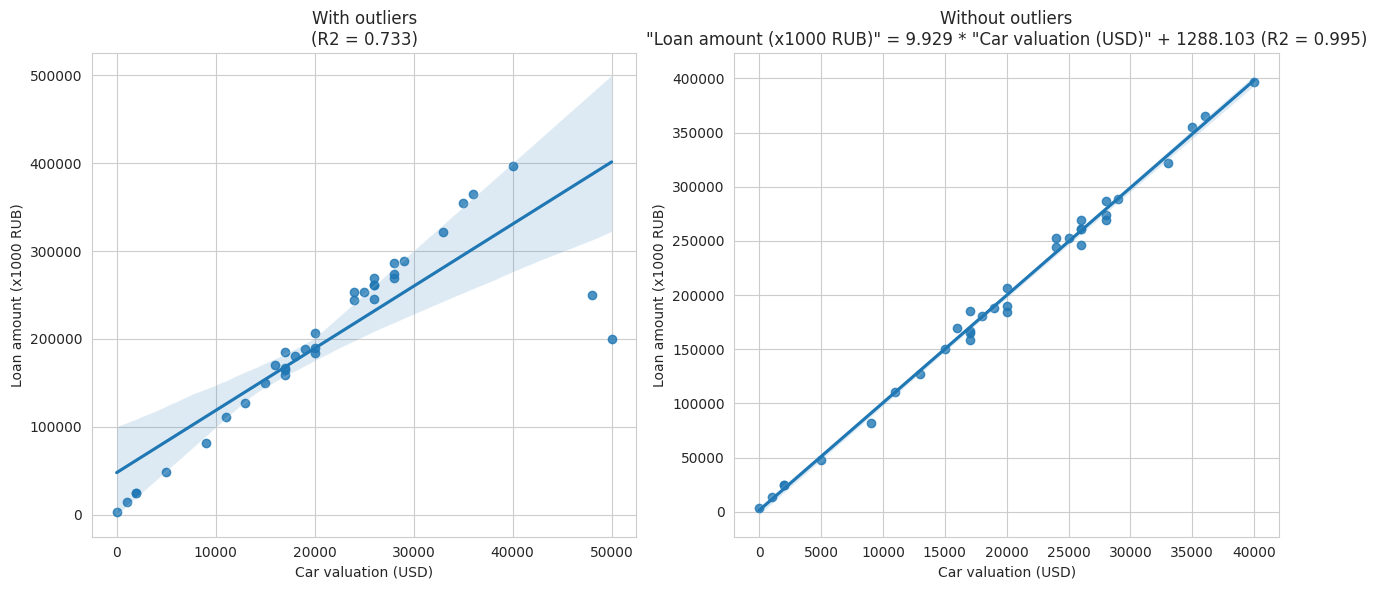

In [13]:
#@title Построение линейной регрессии

linear_regression_plot(cur_df, 'Car valuation (USD)', 'Loan amount (x1000 RUB)', outliers_ids)

Полученную зависимость используем для заполнения **пропусков** и избавления от **выбросов** в данных признаках:

<br/>

**Пропуски:**

<table>
    <tr>
        <th> Age (years) <th/>
        <th> Number of dependants <th/>
        <th> Monthly income (RUB) <th/>
        <th> Residence period in the region (years) <th/>
        <th> Car valuation (USD) <th/>
        <th> Loan amount (x1000 RUB) <th/>
    <tr/>
    <tr>
        <th> 41.000 <th/>
        <th> 2.000 <th/>
        <th> 26100.000 <th/>
        <th> 10.000 <th/>
        <th> nan (26459.098) <th/>
        <th> 264000.000 <th/>
    <tr/>
    <tr>
        <th> 31.000 <th/>
        <th> 1.000 <th/>
        <th> 16200.000 <th/>
        <th> 5.000 <th/>
        <th> 14000.000 <th/>
        <th> nan (140293.843) <th/>
    <tr/>
    <tr>
        <th> 40.000 <th/>
        <th> 2.000 <th/>
        <th> 31400.000 <th/>
        <th> 10.000 <th/>
        <th> nan (31797.008) <th/>
        <th> 317000.000 <th/>
    <tr/>
    <tr>
        <th> 44.000 <th/>
        <th> 3.000 <th/>
        <th> 20300.000 <th/>
        <th> 13.000 <th/>
        <th> 21000.000 <th/>
        <th> nan (209796.713) <th/>
    <tr/>
    <tr>
        <th> 30.000 <th/>
        <th> 1.000 <th/>
        <th> 28200.000 <th/>
        <th> 4.000 <th/>
        <th> nan (27164.105) <th/>
        <th> 271000.000 <th/>
    <tr/>
    <tr>
        <th> 44.000 <th/>
        <th> 2.000 <th/>
        <th> 6300.000 <th/>
        <th> 13.000 <th/>
        <th> 7000.000 <th/>
        <th> nan (70790.973) <th/>
    <tr/>
<table/>

<br/>

**Выбросы:**

<table>
    <tr>
        <th> Age (years) <th/>
        <th> Number of dependants <th/>
        <th> Monthly income (RUB) <th/>
        <th> Residence period in the region (years) <th/>
        <th> Car valuation (USD) <th/>
        <th> Loan amount (x1000 RUB) <th/>
    <tr/>
    <tr>
        <th> 21.000 <th/>
        <th> 3.000 <th/>
        <th> 8200.000 <th/>
        <th> 11.000 <th/>
        <th> 48000.000 <th/>
        <th> 250000.000 <th/>
    <tr/>
    <tr>
        <th> 19.000 <th/>
        <th> 2.000 <th/>
        <th> 8000.000 <th/>
        <th> 12.000 <th/>
        <th> 50000.000 <th/>
        <th> 200000.000 <th/>
    <tr/>
<table/>

In [14]:
#@title Заполнение пропусков

a, b, r = linear_regression_stats(cur_df.drop(outliers_ids, axis=0), 'Car valuation (USD)', 'Loan amount (x1000 RUB)')

missing_values_ids = df[(df['Loan amount (x1000 RUB)'].isna()) | (df['Car valuation (USD)'].isna())].index.tolist()
df['labels'] = 'none'
df.loc[missing_values_ids, 'labels'] = 'missing'

df.loc[outliers_ids, 'labels'] = 'outlier'

# 'Loan amount (x1000 RUB)' = a * 'Car valuation (USD)' + b
ids = df[df['Loan amount (x1000 RUB)'].isna()].index.tolist()
df.loc[ids, 'Loan amount (x1000 RUB)'] = a * df.loc[ids, 'Car valuation (USD)'] + b

# 'Car valuation (USD)' = ('Loan amount (x1000 RUB)' - b) / a
ids = df[df['Car valuation (USD)'].isna()].index.tolist()
df.loc[ids, 'Car valuation (USD)'] = (df.loc[ids, 'Loan amount (x1000 RUB)'] - b) / a

df

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB),labels
0,51.0,3.0,17600.0,17.0,20000.000000,190000.000000,none
1,40.0,2.0,NaN,10.0,13000.000000,127000.000000,none
2,51.0,3.0,7100.0,17.0,9000.000000,82000.000000,none
3,NaN,2.0,16000.0,13.0,17000.000000,165000.000000,none
4,49.0,3.0,14900.0,16.0,17000.000000,159000.000000,none
5,35.0,2.0,29400.0,6.0,29000.000000,289000.000000,none
6,32.0,2.0,37100.0,5.0,36000.000000,365000.000000,none
7,32.0,NaN,27000.0,5.0,26000.000000,261000.000000,none
8,36.0,2.0,29000.0,7.0,28000.000000,287000.000000,none
9,45.0,3.0,38600.0,12.0,40000.000000,397000.000000,none


Таким образом, при помощи `RANSACRegressor`, мы смогли не только заполнить пропуски, но и найти выбросы в исходной выборке. Проверим на графиках ниже полученные результаты. Ожидается, что:
* Будут найдены **выбросы**, мешающие линейным зависимостям признаков
* Объекты с заполненными **пропусками** не будут выбиваться из общего распределения признаков.

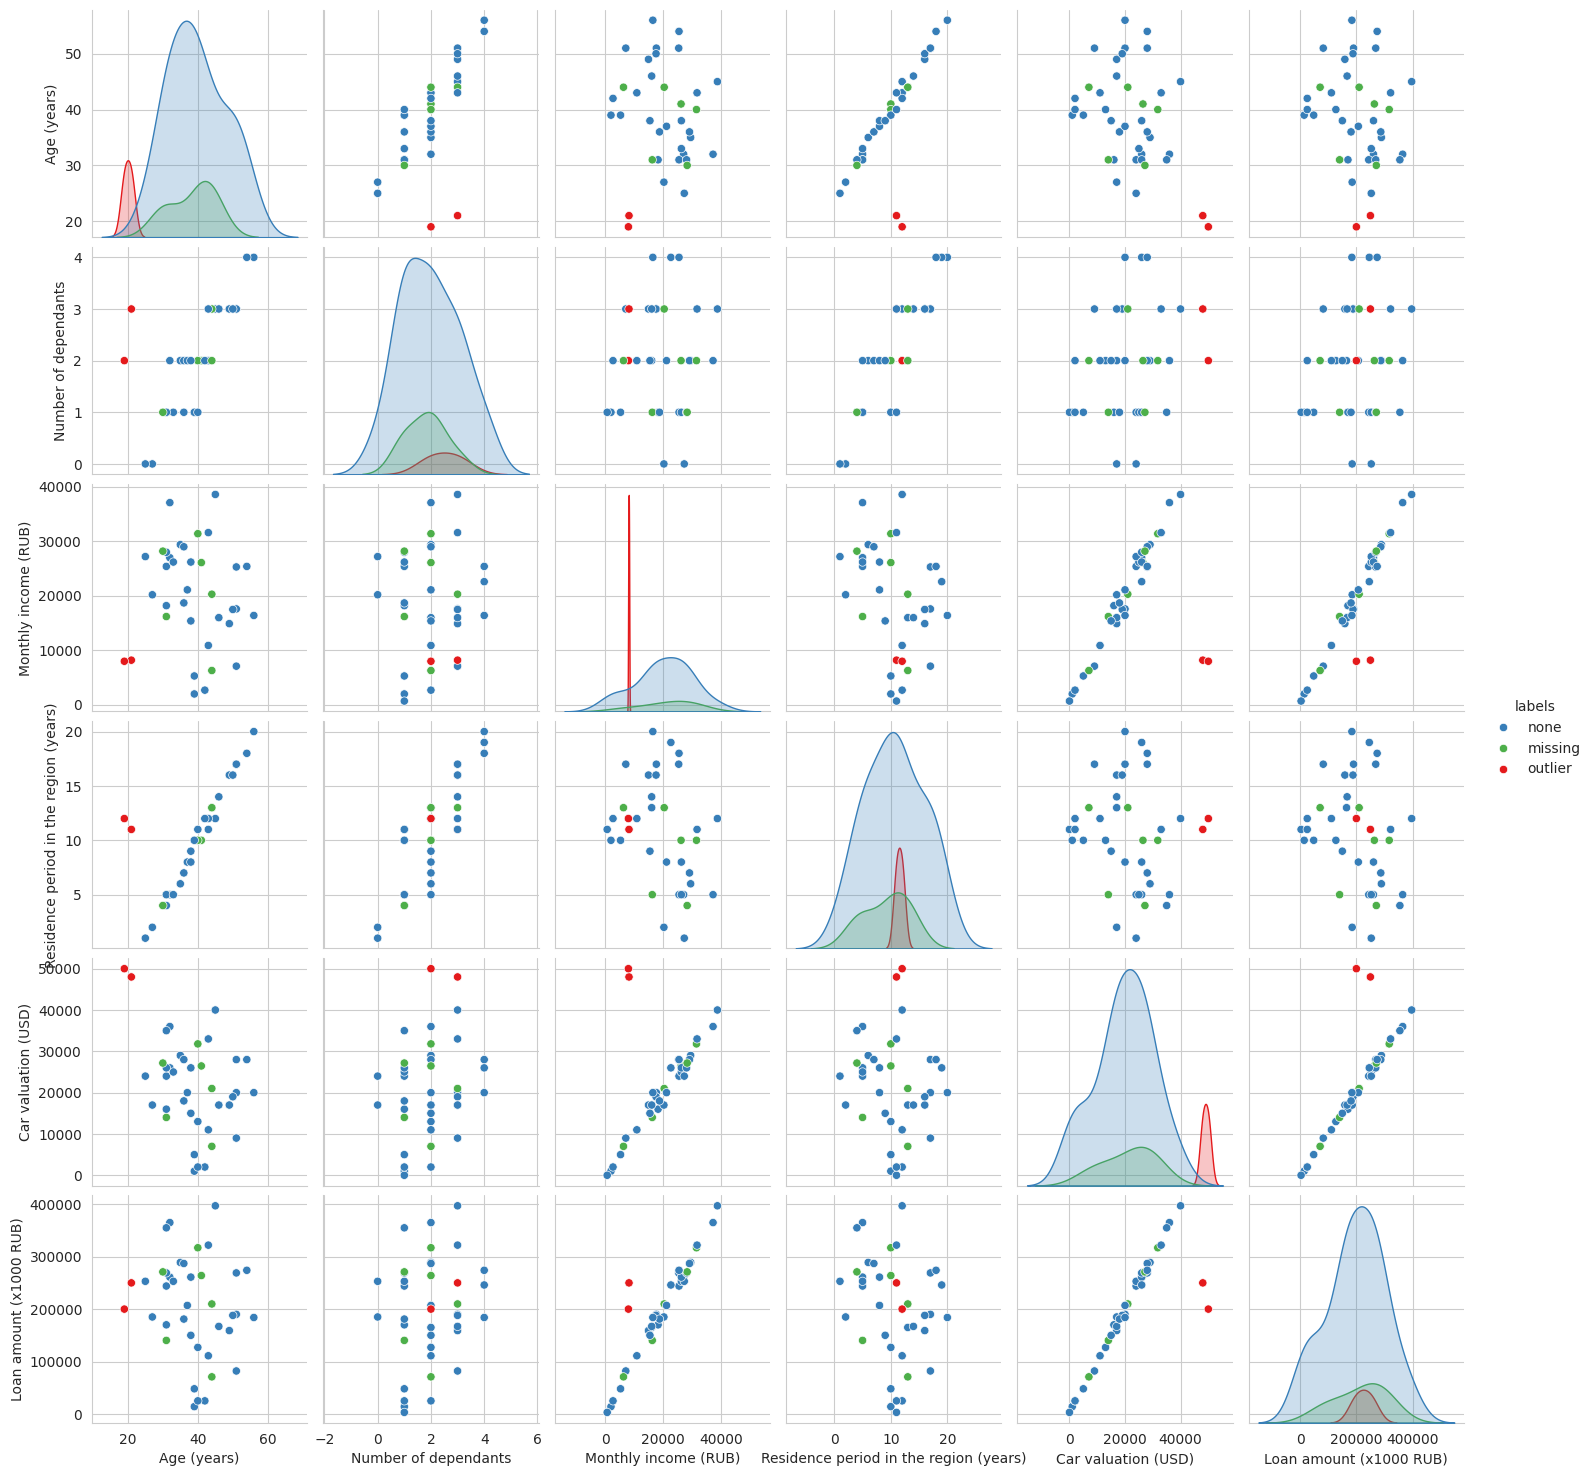

In [15]:
#@title Проверяем полученный результат

red, blue, green = sns.color_palette('Set1', 3)

sns.pairplot(df, hue='labels', palette=[blue, green, red])
plt.show()

In [16]:
#@title Избавляемся от выбросов

df = df.drop(outliers_ids, axis=0)
df = df.drop(columns=['labels'])

df

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
0,51.0,3.0,17600.0,17.0,20000.000000,190000.000000
1,40.0,2.0,NaN,10.0,13000.000000,127000.000000
2,51.0,3.0,7100.0,17.0,9000.000000,82000.000000
3,NaN,2.0,16000.0,13.0,17000.000000,165000.000000
4,49.0,3.0,14900.0,16.0,17000.000000,159000.000000
5,35.0,2.0,29400.0,6.0,29000.000000,289000.000000
6,32.0,2.0,37100.0,5.0,36000.000000,365000.000000
7,32.0,NaN,27000.0,5.0,26000.000000,261000.000000
8,36.0,2.0,29000.0,7.0,28000.000000,287000.000000
9,45.0,3.0,38600.0,12.0,40000.000000,397000.000000


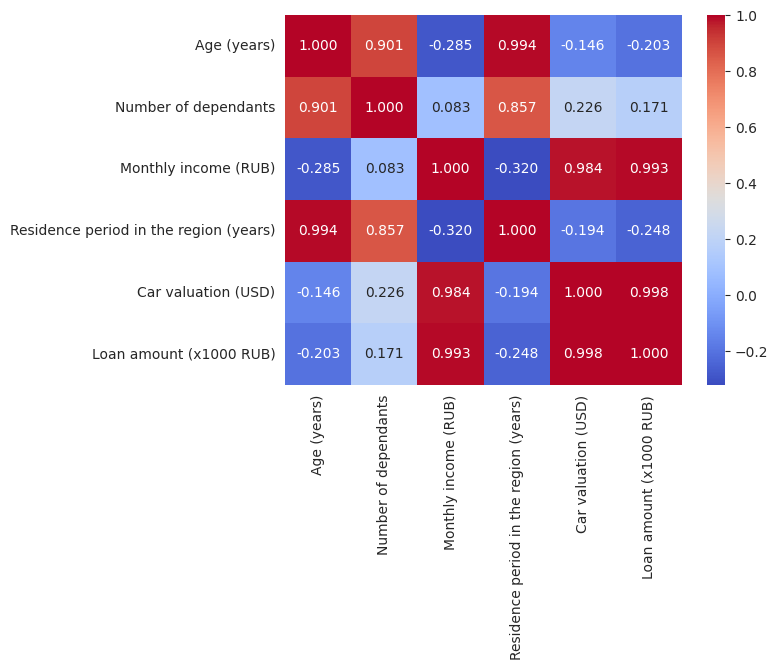

In [17]:
#@title Пересчет корреляционной матрицы

corr_mat = df.corr()

fig = sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()

### Заполнение пропусков

Для заполнения остальных пропусков будем использовать `sklearn.KNNImputer`, который находит $k$ ближайших соседа объекта с пропуском, подсчитывает среднее значение признака с пропуском у всех соседей объекта и использует его для заполнения пропуска.

* **Проблема №1**: часть исходных признаков целочисленные, а среднее значение может оказаться вещественным (например, число иждивенцев не может быть равно 1.5). **Решение**: после заполнения пропусков значения некоторых признаков округлить.

* **Проблема №2**: в датасете есть выбросы, а среднее значение не устойчиво к выбросам. Есть риск породить новые выбросы, заполнив пропуски средним значением. **Решение**: использовать медиану для заполнения пропусков.

<br/>

Поскольку `sklearn.KNNImputer` не поддерживает замену агрегатной функции, создадим свой класс `KNNImputerWithMedian` для заполнения пропусков в датасете.


In [18]:
#@title Создание собственного KNNImputerWithMedian на основе стандартного KNNImputer из sklearn

class KNNImputerWithMedian(KNNImputer):
    def fit_transform(self, X, y=None):
        agg_func = np.ma.average
        np.ma.average = lambda a, axis=None, weights=None: np.ma.median(a, axis=axis)

        try:
            res = super().fit_transform(X)
        finally:
            np.ma.average = agg_func

        return res

Для подсчета расстояния между объектами будем использовать евклидово расстояние. Чтобы все признаки были равноправными, перед заполнением пропусков предварительно стандартизируем датасет, а затем преобразуем его обратно, получив значения пропусков.

In [19]:
#@title Заполнение пропусков медианой

# Метки: нет пропуска (0) / есть пропуск (1)
labels = df.isna().sum(axis=1).to_numpy()

# Стандартизируем датасет
mean, std = df.mean(axis=0), df.std(axis=0)
df = (df - mean) / std

# Заполняем пропуски
imputer = KNNImputerWithMedian(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Возвращаемся к исходному масштабу признаков
df = df * std + mean

# Добавляем метки
df['labels'] = 'not missing'
df.loc[labels == 1, 'labels'] = 'missing'

df

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB),labels
0,51.0,3.0,17600.0,17.0,20000.000000,190000.000000,not missing
1,40.0,2.0,15400.0,10.0,13000.000000,127000.000000,missing
2,51.0,3.0,7100.0,17.0,9000.000000,82000.000000,not missing
3,40.0,2.0,16000.0,13.0,17000.000000,165000.000000,missing
4,49.0,3.0,14900.0,16.0,17000.000000,159000.000000,not missing
5,35.0,2.0,29400.0,6.0,29000.000000,289000.000000,not missing
6,32.0,2.0,37100.0,5.0,36000.000000,365000.000000,not missing
7,32.0,1.0,27000.0,5.0,26000.000000,261000.000000,missing
8,36.0,2.0,29000.0,7.0,28000.000000,287000.000000,not missing
9,45.0,3.0,38600.0,12.0,40000.000000,397000.000000,not missing


Как и в случае с регрессором `RANSACRegressor` после заполнения пропусков при помощи класса `KNNImputerWithMedian` ожидается, что новые объекты не будут выбиваться из общего распределения признаков. Убедимся в этом при помощи графиков ниже:

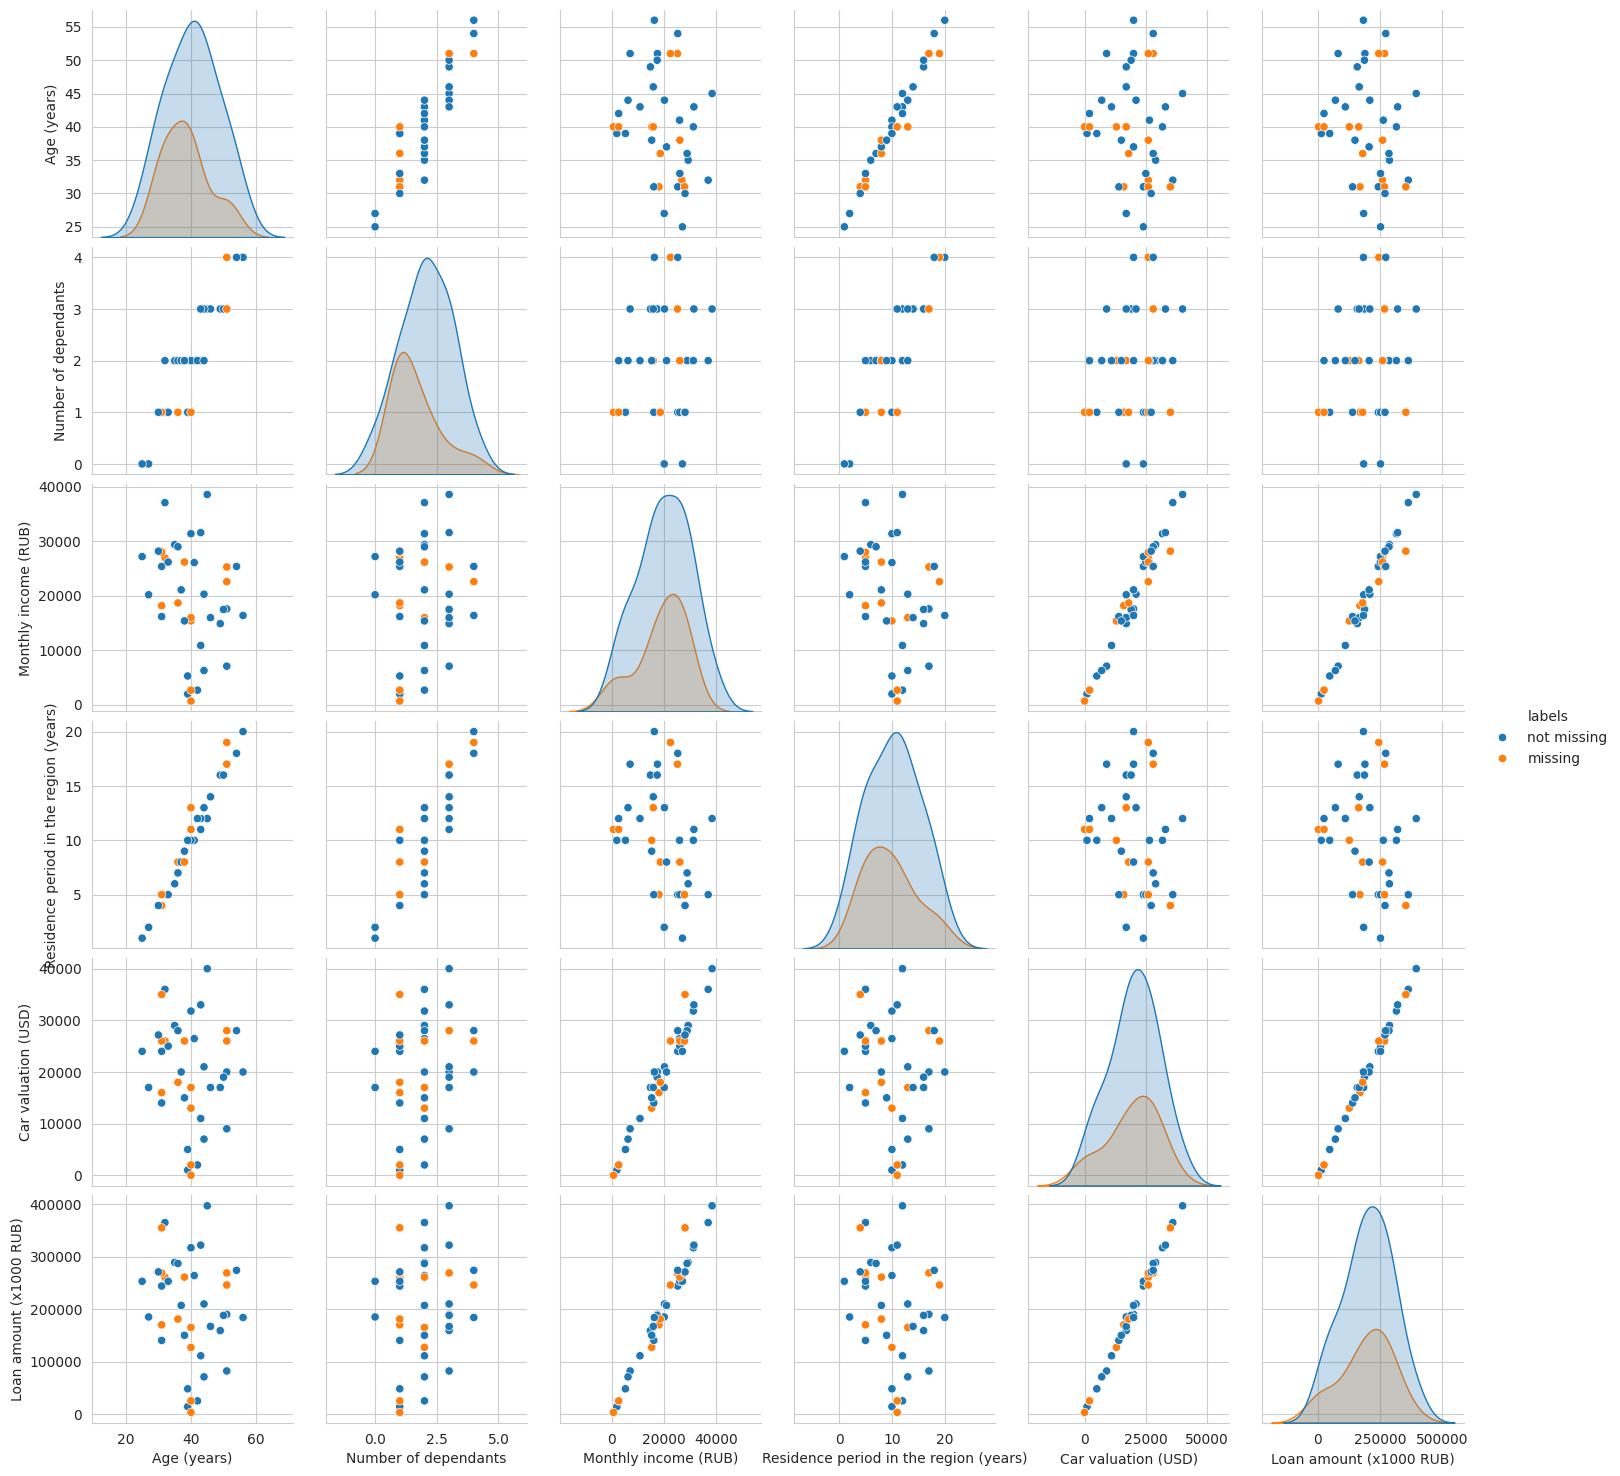

In [20]:
#@title Проверяем заполненные пропуски

sns.pairplot(df, hue='labels')
plt.show()

In [21]:
#@title Удаляем ненужный признак

df = df.drop(columns='labels')

### Избавление от выбросов

Часть выбросов была найдена при исследовании линейной зависимости между признаками "Оценка автомобиля" и "Размер кредита". Однако в выборке есть еще один выброс:

<br/>

<table>
    <tr>
        <th> Age (years) <th/>
        <th> Number of dependants <th/>
        <th> Monthly income (RUB) <th/>
        <th> Residence period in the region (years) <th/>
        <th> Car valuation (USD) <th/>
        <th> Loan amount (x1000 RUB) <th/>
    <tr/>
    <tr>
        <th> 40.000 <th/>
        <th> 1.000 <th/>
        <th> 700.000 <th/>
        <th> 11.000 <th/>
        <th> 0.000 <th/>
        <th> 3000.000 <th/>
    <tr/>
<table/>

<br/>

Действительно, машина не может быть бесплатной. Даже если это так, то зачем брать такую машину в кредит? Данный объект можно рассматривать как объект с ошибочным значением, также удалим его из выборки.

In [22]:
#@title Удаляем выбросы

df = df[df['Car valuation (USD)'] > 0]

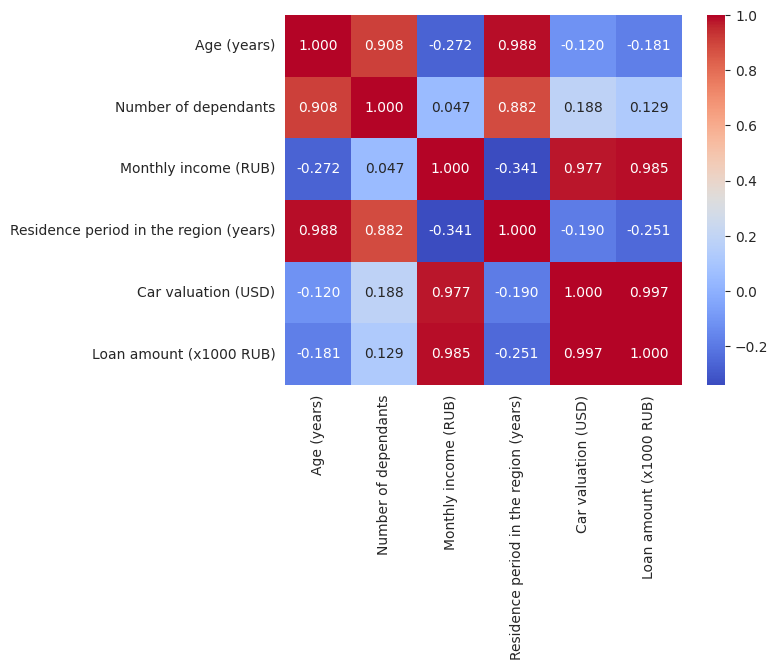

In [23]:
#@title Пересчет корреляционной матрицы

corr_mat = df.corr()

fig = sns.heatmap(corr_mat, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()

In [24]:
#@title Проверяем число оставшихся объектов в выборке

df.info() # Было 42, стало 39

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age (years)                             39 non-null     float64
 1   Number of dependants                    39 non-null     float64
 2   Monthly income (RUB)                    39 non-null     float64
 3   Residence period in the region (years)  39 non-null     float64
 4   Car valuation (USD)                     39 non-null     float64
 5   Loan amount (x1000 RUB)                 39 non-null     float64
dtypes: float64(6)
memory usage: 2.1 KB


## Снижение размерности метод PCA

> 4. Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна $1$ (полученная матрица обозначается через $Z$).

In [25]:
#@title Центрирование
df_centered = df - df.mean()

norms_centered = df_centered.apply(lambda x: np.linalg.norm(x))

df_centered

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
0,11.179487,1.025641,-2753.846154,6.923077,-523.595162,-15022.603306
1,0.179487,0.025641,-4953.846154,-0.076923,-7523.595162,-78022.603306
2,11.179487,1.025641,-13253.846154,6.923077,-11523.595162,-123022.603306
3,0.179487,0.025641,-4353.846154,2.923077,-3523.595162,-40022.603306
4,9.179487,1.025641,-5453.846154,5.923077,-3523.595162,-46022.603306
5,-4.820513,0.025641,9046.153846,-4.076923,8476.404838,83977.396694
6,-7.820513,0.025641,16746.153846,-5.076923,15476.404838,159977.396694
7,-7.820513,-0.974359,6646.153846,-5.076923,5476.404838,55977.396694
8,-3.820513,0.025641,8646.153846,-3.076923,7476.404838,81977.396694
9,5.179487,1.025641,18246.153846,1.923077,19476.404838,191977.396694


In [26]:
#@title Евклидовы нормы для каждого столбца

norms_centered

,0
Age (years),48.823597
Number of dependants,6.401122
Monthly income (RUB),57406.767224
Residence period in the region (years),30.834546
Car valuation (USD),59317.129235
Loan amount (x1000 RUB),591096.386552


In [27]:
#@title Делим на евклидову норму, чтобы норма была равна 1

Z = df_centered / norms_centered  # (df_normalized)

Z

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
0,0.228977,0.160228,-0.047971,0.224523,-0.008827,-0.025415
1,0.003676,0.004006,-0.086294,-0.002495,-0.126837,-0.131996
2,0.228977,0.160228,-0.230876,0.224523,-0.194271,-0.208126
3,0.003676,0.004006,-0.075842,0.094799,-0.059403,-0.067709
4,0.188013,0.160228,-0.095004,0.192092,-0.059403,-0.077860
5,-0.098733,0.004006,0.157580,-0.132219,0.142900,0.142071
6,-0.160179,0.004006,0.291710,-0.164650,0.260910,0.270645
7,-0.160179,-0.152217,0.115773,-0.164650,0.092324,0.094701
8,-0.078251,0.004006,0.150612,-0.099788,0.126041,0.138687
9,0.106086,0.160228,0.317840,0.062368,0.328344,0.324782


Убедимся в корректности центрирования и нормировки:
* Mean каждого признака должен равняться $0$
* Std каждого признака должен равняться $\frac{1}{\sqrt{n-1}}$, где $n$ - объем выборки

Действительно:

$$x_{ij} \to y_{ij} = x_{ij} - \overline{x_j} \to z_{ij} = \frac{y_{ij}}{||y_j||_2} = \frac{y_{ij}}{\sqrt{\sum_{i=1}^n y_{ij}^2}} = \frac{x_{ij} - \overline{x_j}}{\sqrt{\sum_{i=1}^n (x_{ij} - \overline{x_j})^2}} = \frac{x_{ij} - \overline{x_j}}{\sqrt{n-1} \cdot \sigma_{j}}$$

In [28]:
#@title Проверки правильности центрирования и нормировки

# len(Z) = 39, 1 / math.sqrt(38) \approx 0.1622
Z.describe()

,Age (years),Number of dependants,Monthly income (RUB),Residence period in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,6.689805e-17,-1.708035e-17,2.704389e-17,8.540177e-18,5.764620e-17,1.779204e-17
std,1.622214e-01,1.622214e-01,1.622214e-01,1.622214e-01,1.622214e-01,1.622214e-01
min,-3.035523e-01,-3.084395e-01,-3.197157e-01,-2.943751e-01,-3.291392e-01,-3.231666e-01
25%,-1.499380e-01,-1.522169e-01,-8.106790e-02,-1.646505e-01,-8.469046e-02,-8.547270e-02
50%,3.676238e-03,4.005708e-03,-9.379757e-04,-2.494704e-03,-8.827048e-03,3.345303e-03
75%,9.584479e-02,1.602283e-01,1.175150e-01,9.479877e-02,1.060066e-01,1.082351e-01
max,3.313866e-01,3.164509e-01,3.178398e-01,3.218169e-01,3.283437e-01,3.247819e-01


> 5. Найти SVD разложение матрицы $Z$ (матрицы $U$, $S$, $V$).

In [29]:
#@title SVD разложение

np_matrix = Z.values
U, singular_values, Vt = np.linalg.svd(np_matrix, full_matrices=False)

df_U = pd.DataFrame(U)
display(df_U.style.set_caption("Матрица U").format("{:.4f}"))

S_matrix = np.zeros((Z.shape[0], Z.shape[1]))
min_dim = min(Z.shape[0], Z.shape[1])
S_matrix[:min_dim, :min_dim] = np.diag(singular_values)
df_S = pd.DataFrame(S_matrix)
display(df_S.style.set_caption("Матрица S").format("{:.4f}"))

df_Vt = pd.DataFrame(Vt)
display(df_Vt.style.set_caption("Матрица V (транспонированная)").format("{:.4f}"))

,0,1,2,3,4,5
0,-0.1416,0.1552,-0.2008,-0.0420,0.0244,-0.0761
1,-0.0867,-0.0721,0.1775,-0.2415,0.0578,-0.2068
2,-0.2797,0.0391,0.0200,0.0506,0.1254,-0.0783
3,-0.0739,-0.0164,-0.0829,0.1069,-0.6242,-0.0127
4,-0.1631,0.1044,-0.0162,0.0318,-0.0097,-0.1957
5,0.1615,0.0347,0.2337,0.0127,0.1645,-0.2148
6,0.2775,0.0898,0.2445,-0.0198,-0.1154,0.0984
7,0.1675,-0.0722,-0.0805,-0.0603,-0.0084,-0.1888
8,0.1431,0.0423,0.1585,-0.0466,0.0809,0.2157
9,0.1856,0.3028,-0.1285,-0.1481,0.1224,0.1177


,0,1,2,3,4,5
0,1.8183,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,1.6174,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.2344,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.1129,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0962,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0257
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,0,1,2,3,4,5
0,-0.3854,-0.2389,0.4794,-0.4124,0.4340,0.4541
1,0.4355,0.5448,0.2975,0.4026,0.3777,0.3469
2,-0.3787,0.7952,0.0592,-0.4033,-0.1828,-0.1570
3,-0.2003,0.1172,-0.8142,-0.0176,0.3824,0.3697
4,0.6912,-0.0067,-0.1237,-0.7074,-0.0089,0.0797
5,-0.0233,0.0022,-0.0010,0.0663,-0.6995,0.7112


In [30]:
#@title Найденные сингулярные числа и их квадраты:

sing_val_df = pd.DataFrame(singular_values)
display(sing_val_df.style.set_caption("Сингулярные числа").format("{:.4f}"))

sq_singular_values = singular_values ** 2
sq_sing_val_df = pd.DataFrame(sq_singular_values)
display(sq_sing_val_df.style.set_caption("Квадраты сингулярных чисел").format("{:.4f}"))

,0
0,1.8183
1,1.6174
2,0.2344
3,0.1129
4,0.0962
5,0.0257


,0
0,3.3063
1,2.6160
2,0.0550
3,0.0127
4,0.0093
5,0.0007


> 6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных $Z$.

In [31]:
#@title Вклад каждого фактора в %

sum_sing_val = np.sum(sq_sing_val_df)

factor_valuations = (sq_sing_val_df / sum_sing_val) * 100

factor_valuations


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,55.105704
1,43.600600
2,0.916091
3,0.212401
4,0.154194
5,0.011010


### Предварительный вывод:

Первые 2 фактора вносят >98% в вариацию данных. Построим PCA на 2 компонентах:

In [32]:
#@title Построение PCA

Z_pca = U[:,:2] @ np.diag(singular_values[:2])
Z_pca

array([[-0.2574773 ,  0.25099107],
       [-0.15769811, -0.11657961],
       [-0.50860741,  0.06316793],
       [-0.13435084, -0.02652837],
       [-0.29662766,  0.1688094 ],
       [ 0.29368856,  0.05607068],
       [ 0.50464097,  0.14532054],
       [ 0.30456269, -0.11682052],
       [ 0.2602275 ,  0.06843582],
       [ 0.33746491,  0.48981125],
       [ 0.0958973 , -0.28841121],
       [ 0.12748028,  0.1138749 ],
       [ 0.04174264, -0.32894149],
       [ 0.24045471, -0.42283737],
       [ 0.27140192, -0.15674127],
       [-0.27262693, -0.10914455],
       [-0.24589851,  0.22095429],
       [-0.23086911,  0.12632791],
       [ 0.04356848, -0.18285701],
       [-0.39898676, -0.4227557 ],
       [ 0.25940168,  0.19750681],
       [ 0.4739153 , -0.02011612],
       [-0.10365824,  0.16829387],
       [-0.07395667,  0.38818623],
       [ 0.27652677, -0.12310759],
       [-0.46512408, -0.2683252 ],
       [ 0.43152344, -0.33298974],
       [ 0.19933984,  0.3340593 ],
       [ 0.05300124,

> 7. Замените значения исходных признаков линейными комбинациями главных факторов (матрица $Z_k$, $k$ – число главных факторов). Вычислите норму разности  $||Z-Z_k||$ (погрешность аппроксимации) в операторной матричной  норме и норме Фробениуса.

Абсолютная ошибка аппроксимации:

* Норма Фробениуса: $||Z-Z_2||^2_F = \sigma^2_3 + \dots + \sigma^2_6$
* Операторная матричная норма: $||Z-Z_2||_2 = \sigma_3$

Относительная погрешность:
* Норма Фробениуса: $\frac{||Z-Z_2||_F^2}{||Z||^2_F} = \frac{\sigma^2_3 + \dots + \sigma^2_6}{\sigma^2_1 + \dots + \sigma^2_6}$
* Операторная матричная норма: $\frac{||Z-Z_2||_2}{||Z||_2} = \frac{\sigma_{3}}{\sigma_1}$

In [33]:
#@title Абсолютная ошибка аппроксимации

Z_2 = Z_pca @ Vt[:2, :]

approx_error = np.linalg.norm(Z - Z_2, 'fro') ** 2

print(f'Абсолютная ошибка (норма Фробениуса): {approx_error:.5f}') # или sq_singular_values[2:].sum()
print(f'Абсолютная ошибка (операторная матричная норма): {singular_values[2]:.5f}')

Абсолютная ошибка (норма Фробениуса): 0.07762
Абсолютная ошибка (операторная матричная норма): 0.23445


In [34]:
#@title Относительная ошибка аппроксимации

rel_error = approx_error / np.linalg.norm(Z, 'fro') ** 2

print(f'Относительная ошибка (норма Фробениуса): {rel_error:.5f}') # или sq_singular_values[2:].sum() / sq_singular_values.sum()
print(f'Относительная ошибка (операторная матричная норма): {singular_values[2] / singular_values[0]:.5f}')

Относительная ошибка (норма Фробениуса): 0.01294
Относительная ошибка (операторная матричная норма): 0.12894


> 8. Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности $k$) и построить карту клиентов. Сделать выводы о клиентах банка.

## Результаты

Были получены 2 новые характеристики для клиентов. Назовем их $U_1$ и $U_2$.

Пользуясь выражением:
$$Z_{PCA} = [u_{*,1} \;\; u_{*,2}] \cdot diag(\sigma_1, \sigma_2) = Z \cdot [v_{*,1} \;\; v_{*,2}]$$

Выразим новые признаки $U_1$ и $U_2$ через старые (не забывая про центрирование и нормировку):


$$U_1 = -0.39 \cdot \frac{\text{Возраст} - 39.82}{48.82} -0.24 \cdot \frac{\text{Число иждивенцев} - 1.97}{6.40} + 0.48 \cdot \frac{\text{Мес. доход (руб.)} - 20353.85}{57406.77} - \\ -0.41 \cdot \frac{\text{Время проживания в регионе (лет)} - 10.08}{30.83} + 0.43 \cdot \frac{\text{Оценка автомобиля} - 20523.60}{59317.13} + \\ + 0.45 \cdot \frac{\text{Размер кредита} - 205022.60}{591096.39}$$

$$U_2 = 0.44 \cdot \frac{\text{Возраст} - 39.82}{48.82} + 0.54 \cdot \frac{\text{Число иждивенцев} - 1.97}{6.40} + 0.30 \cdot \frac{\text{Мес. доход (руб.)} - 20353.85}{57406.77} + \\ + 0.40 \cdot \frac{\text{Время проживания в регионе (лет)} - 10.08}{30.83} + 0.38 \cdot \frac{\text{Оценка автомобиля} - 20523.60}{59317.13} + \\ + 0.35 \cdot \frac{\text{Размер кредита} - 205022.60}{591096.39}$$

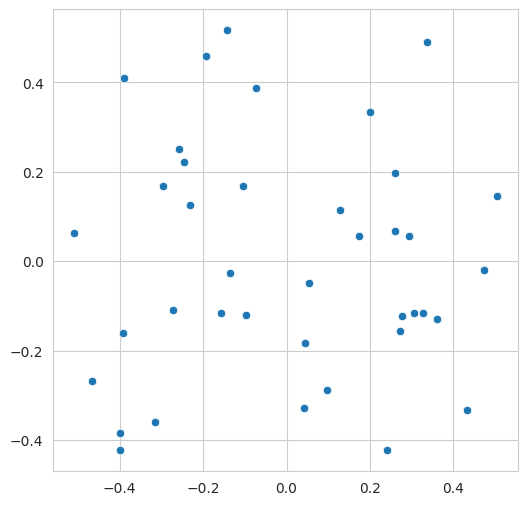

In [35]:
#@title Карта клиентов

plt.figure(figsize=(6, 6))

sns.scatterplot(x=Z_pca[:, 0], y=Z_pca[:, 1])
plt.show()

## Снижение размерности. Метод MDS

Существует 3 вида MDS:
* Strain based scaling (Сlassical Scaling)
* Distance MDS
* Non distance MDS

<br/>

Запустим второй вариант MDS с использованием реализации MDS из `sklearn`. Отметим, что второй вариант предполагает передачу матрицы расстояний между объектами выборки в качестве параметра метода `fit_transform`, то есть возникает возможность выбора метрики.

> 9. Вычислите расстояние между клиентами любым понравившемся вам способом (расстояние Чебышева, Манхэттенских кварталов, Минковского). Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением всех расстояний между клиентами.

In [36]:
#@title Метод для подсчета матрицы расстояний

from scipy.spatial.distance import chebyshev, cityblock, euclidean

def dist_matrix(Z : pd.DataFrame, metric):
    n_objects = len(Z)

    dist_matrix = np.zeros((n_objects, n_objects))

    for i in range(n_objects):
        for j in range(i, n_objects):
            dist_matrix[i, j] = round(metric(Z.iloc[i], Z.iloc[j]), 2)
            dist_matrix[j, i] = dist_matrix[i, j]

    return dist_matrix

In [37]:
#@title Расстояние между клиентами (с использованием евклидовой метрики)

display(pd.DataFrame(dist_matrix(Z, euclidean)).style.set_caption("Расстояние между клиентами").format("{:.2f}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.00,0.39,0.32,0.31,0.10,0.59,0.78,0.67,0.56,0.64,0.65,0.41,0.66,0.84,0.67,0.36,0.04,0.16,0.53,0.69,0.52,0.79,0.20,0.23,0.65,0.57,0.90,0.47,0.44,0.48,0.61,0.69,0.42,0.73,0.65,0.21,0.24,0.44,0.29
1,0.39,0.00,0.40,0.14,0.32,0.48,0.71,0.47,0.46,0.79,0.31,0.37,0.29,0.51,0.43,0.13,0.36,0.26,0.23,0.40,0.53,0.66,0.29,0.53,0.44,0.34,0.63,0.58,0.22,0.38,0.30,0.49,0.07,0.52,0.37,0.58,0.58,0.25,0.64
2,0.32,0.40,0.00,0.39,0.24,0.80,1.02,0.83,0.77,0.95,0.70,0.64,0.68,0.89,0.81,0.29,0.31,0.29,0.61,0.50,0.78,0.99,0.42,0.55,0.81,0.34,1.02,0.76,0.57,0.68,0.47,0.86,0.45,0.89,0.46,0.37,0.51,0.25,0.58
3,0.31,0.14,0.39,0.00,0.26,0.45,0.67,0.45,0.42,0.70,0.36,0.31,0.36,0.55,0.43,0.18,0.28,0.20,0.25,0.48,0.46,0.62,0.22,0.43,0.43,0.42,0.65,0.50,0.21,0.33,0.39,0.47,0.14,0.51,0.45,0.51,0.49,0.30,0.55
4,0.10,0.32,0.24,0.26,0.00,0.60,0.80,0.67,0.57,0.71,0.60,0.43,0.60,0.80,0.65,0.28,0.08,0.09,0.49,0.60,0.56,0.80,0.20,0.32,0.64,0.47,0.88,0.52,0.42,0.48,0.53,0.69,0.36,0.72,0.56,0.26,0.31,0.34,0.38
5,0.59,0.48,0.80,0.45,0.60,0.00,0.23,0.19,0.04,0.44,0.40,0.20,0.46,0.49,0.22,0.59,0.57,0.53,0.36,0.85,0.18,0.24,0.41,0.52,0.20,0.83,0.42,0.29,0.26,0.13,0.74,0.19,0.43,0.20,0.83,0.77,0.64,0.72,0.64
6,0.78,0.71,1.02,0.67,0.80,0.23,0.00,0.34,0.26,0.39,0.60,0.39,0.66,0.63,0.39,0.82,0.76,0.74,0.58,1.07,0.27,0.22,0.61,0.64,0.36,1.05,0.49,0.36,0.49,0.35,0.97,0.32,0.66,0.31,1.05,0.93,0.77,0.95,0.75
7,0.67,0.47,0.83,0.45,0.67,0.19,0.34,0.00,0.20,0.61,0.28,0.29,0.34,0.31,0.06,0.58,0.65,0.59,0.27,0.77,0.32,0.22,0.50,0.63,0.03,0.79,0.25,0.47,0.27,0.22,0.67,0.03,0.41,0.06,0.75,0.87,0.76,0.70,0.78
8,0.56,0.46,0.77,0.42,0.57,0.04,0.26,0.20,0.00,0.43,0.39,0.16,0.45,0.50,0.23,0.56,0.53,0.49,0.34,0.82,0.16,0.27,0.38,0.48,0.20,0.80,0.44,0.27,0.24,0.09,0.72,0.20,0.40,0.22,0.80,0.73,0.60,0.69,0.60
9,0.64,0.79,0.95,0.70,0.71,0.44,0.39,0.61,0.43,0.00,0.82,0.43,0.87,0.92,0.65,0.86,0.64,0.68,0.73,1.17,0.30,0.54,0.55,0.43,0.62,1.11,0.83,0.22,0.61,0.47,1.07,0.61,0.75,0.62,1.14,0.73,0.54,0.98,0.48


> 10. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.8 и сделайте выводы.

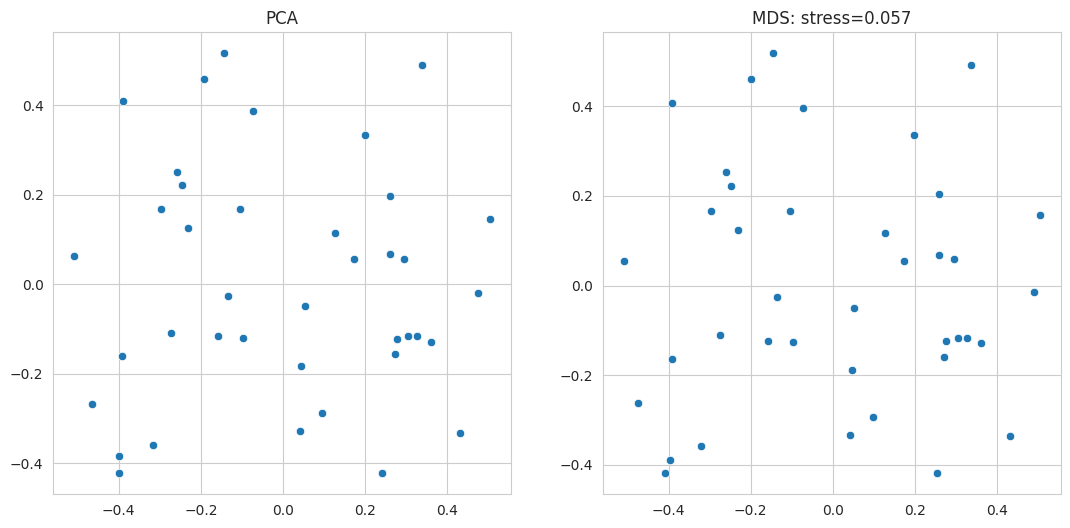

In [38]:
#@title Пользуемся готовой реализацией MDS из sklearn

from sklearn.manifold import MDS

fig, axes = plt.subplots(1, 2, figsize=(13, 6))

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=21)

Z_mds = mds.fit_transform(dist_matrix(Z, euclidean))

sns.scatterplot(x=Z_pca[:, 0], y=Z_pca[:, 1], ax=axes[0])
axes[0].set_title('PCA')

sns.scatterplot(x=Z_mds[:, 0], y=Z_mds[:, 1], ax=axes[1])
axes[1].set_title(f'MDS: stress={mds.stress_:.3f}')

plt.show()

In [39]:
#@title Разность матриц расстояний

dist_matrix(Z, euclidean) - dist_matrix(pd.DataFrame(Z_mds), euclidean)

array([[ 0.  ,  0.  ,  0.  , ...,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.01,  0.01,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  , -0.01],
       ...,
       [ 0.02, -0.01,  0.  , ...,  0.  ,  0.  ,  0.02],
       [ 0.  ,  0.01,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.01, ...,  0.02,  0.  ,  0.  ]])

In [40]:
#@title Норма Фробениуса разности матриц расстояний

np.linalg.norm(dist_matrix(Z, euclidean) - dist_matrix(pd.DataFrame(Z_mds), euclidean), 'fro')

np.float64(0.33166247903554)

> **Вывод**: алгоритм MDS с использованием евклидовой метрики дал те же результаты, что и PCA с точностью до преобразования поворота или отзеркаливания (код выше можно запустить несколько раз c различным `random_state` и убедиться, что иногда результат MDS получается повернутым результатом PCA или отзеркаленным)

Рассмотрим другой вариант MDS: Strain based scaling (Сlassical Scaling)

Здесь задача сохранения расстояний между объектами (для евклидовой метрики) сводится к минимизации $||ZZ^T - Z_{MDS}Z_{MDS}^T||_F$, а эта задача решается при помощи спектрального разложения матрицы $ZZ^T$

In [41]:
#@title Считаем матрицу Грама

np_matrix = Z.to_numpy()

gram_matrix = np_matrix @ np_matrix.T

df_gram_matrix = pd.DataFrame(gram_matrix)
display(df_gram_matrix.style.set_caption("Матрица Грама").format("{:.2f}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.13,0.01,0.15,0.03,0.12,-0.06,-0.10,-0.11,-0.05,0.04,-0.10,-0.00,-0.10,-0.17,-0.11,0.04,0.12,0.09,-0.05,-0.00,-0.01,-0.13,0.07,0.12,-0.10,0.05,-0.19,0.03,-0.03,-0.03,-0.01,-0.11,-0.01,-0.13,0.01,0.20,0.16,0.06,0.17
1,0.01,0.04,0.07,0.02,0.03,-0.05,-0.09,-0.03,-0.05,-0.11,0.02,-0.03,0.03,0.01,-0.02,0.06,0.01,0.02,0.01,0.11,-0.07,-0.08,-0.00,-0.04,-0.03,0.11,-0.03,-0.07,-0.00,-0.03,0.09,-0.04,0.03,-0.04,0.11,0.01,-0.02,0.08,-0.04
2,0.15,0.07,0.26,0.07,0.16,-0.15,-0.25,-0.16,-0.13,-0.14,-0.07,-0.06,-0.04,-0.15,-0.15,0.13,0.14,0.13,-0.03,0.18,-0.12,-0.24,0.06,0.06,-0.15,0.22,-0.24,-0.08,-0.03,-0.08,0.14,-0.17,0.04,-0.19,0.18,0.22,0.13,0.19,0.11
3,0.03,0.02,0.07,0.02,0.04,-0.04,-0.07,-0.04,-0.04,-0.06,-0.01,-0.02,0.00,-0.02,-0.03,0.04,0.03,0.03,0.00,0.06,-0.04,-0.06,0.01,0.00,-0.03,0.07,-0.05,-0.04,-0.01,-0.03,0.05,-0.04,0.01,-0.04,0.06,0.04,0.02,0.06,0.00
4,0.12,0.03,0.16,0.04,0.12,-0.08,-0.13,-0.11,-0.07,-0.02,-0.08,-0.02,-0.07,-0.14,-0.11,0.06,0.11,0.09,-0.04,0.05,-0.04,-0.14,0.06,0.09,-0.10,0.09,-0.18,-0.00,-0.02,-0.04,0.03,-0.12,0.01,-0.13,0.05,0.18,0.13,0.09,0.13
5,-0.06,-0.05,-0.15,-0.04,-0.08,0.09,0.16,0.08,0.08,0.13,0.01,0.04,-0.00,0.05,0.07,-0.09,-0.06,-0.06,-0.00,-0.14,0.08,0.14,-0.02,-0.00,0.07,-0.15,0.11,0.08,0.02,0.06,-0.12,0.09,-0.03,0.10,-0.14,-0.09,-0.03,-0.12,-0.01
6,-0.10,-0.09,-0.25,-0.07,-0.13,0.16,0.28,0.14,0.14,0.24,0.01,0.08,-0.02,0.06,0.11,-0.15,-0.09,-0.10,-0.01,-0.26,0.16,0.23,-0.02,0.01,0.12,-0.27,0.17,0.15,0.02,0.10,-0.21,0.15,-0.06,0.16,-0.26,-0.14,-0.03,-0.22,0.00
7,-0.11,-0.03,-0.16,-0.04,-0.11,0.08,0.14,0.11,0.07,0.05,0.06,0.03,0.05,0.12,0.10,-0.07,-0.10,-0.09,0.04,-0.07,0.06,0.15,-0.05,-0.07,0.10,-0.11,0.17,0.02,0.02,0.05,-0.05,0.11,-0.02,0.12,-0.08,-0.17,-0.11,-0.10,-0.10
8,-0.05,-0.05,-0.13,-0.04,-0.07,0.08,0.14,0.07,0.07,0.12,0.01,0.04,-0.01,0.03,0.06,-0.08,-0.05,-0.05,-0.00,-0.13,0.08,0.12,-0.01,0.00,0.06,-0.14,0.09,0.08,0.01,0.05,-0.11,0.08,-0.03,0.08,-0.13,-0.07,-0.02,-0.11,-0.00
9,0.04,-0.11,-0.14,-0.06,-0.02,0.13,0.24,0.05,0.12,0.36,-0.11,0.10,-0.15,-0.12,0.01,-0.15,0.03,-0.02,-0.07,-0.34,0.19,0.15,0.05,0.17,0.03,-0.29,-0.02,0.23,-0.01,0.09,-0.28,0.05,-0.09,0.06,-0.32,0.07,0.16,-0.21,0.20


In [42]:
#@title Находим спектральное разложение матрицы Грама

from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eigh(gram_matrix)

# Сортируем собственные значения в невозрастающем порядке
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

df_eigenvalues = pd.DataFrame(eigenvalues)
display(df_eigenvalues.style.set_caption("Собственные значения").format("{:.2f}"))

df_eigenvectors = pd.DataFrame(eigenvectors)
display(df_eigenvectors.style.set_caption("Собственные векторы").format("{:.2f}"))

,0
0,3.31
1,2.62
2,0.05
3,0.01
4,0.01
5,0.00
6,0.00
7,0.00
8,0.00
9,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-0.14,-0.16,-0.20,0.04,-0.02,0.08,-0.19,0.55,-0.06,0.00,-0.61,0.00,-0.37,0.00,0.00,0.00,-0.10,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,0.00,-0.10,-0.02,0.00,0.00,-0.03
1,-0.09,0.07,0.18,0.24,-0.06,0.21,0.30,-0.44,0.00,0.01,-0.16,0.01,-0.26,-0.00,-0.03,0.07,-0.09,-0.01,0.02,0.12,0.01,0.05,0.08,-0.01,0.02,0.10,-0.00,0.09,-0.30,0.05,-0.07,0.04,-0.01,0.00,-0.42,-0.06,-0.07,0.25,-0.27
2,-0.28,-0.04,0.02,-0.05,-0.13,0.08,-0.67,-0.21,0.18,0.01,0.20,0.10,-0.19,-0.01,0.12,0.06,0.12,-0.08,-0.16,0.11,-0.02,-0.04,0.03,0.01,0.04,-0.04,0.06,-0.02,0.09,-0.09,-0.09,-0.09,-0.07,-0.00,-0.16,0.04,0.01,0.31,0.20
3,-0.07,0.02,-0.08,-0.11,0.62,0.01,-0.15,-0.16,-0.21,0.07,-0.02,-0.17,-0.02,-0.01,-0.02,-0.10,0.03,-0.01,-0.02,0.04,0.12,0.06,0.04,0.27,-0.04,0.14,-0.07,-0.25,-0.10,-0.39,0.00,0.13,0.07,-0.14,0.06,-0.20,-0.04,0.04,-0.12
4,-0.16,-0.10,-0.02,-0.03,0.01,0.20,0.17,-0.18,-0.07,0.20,-0.24,-0.02,-0.18,-0.02,0.05,0.07,0.34,-0.00,0.23,-0.32,-0.04,0.11,0.23,0.20,0.07,-0.07,-0.12,0.02,0.23,0.12,-0.01,-0.17,0.25,0.12,0.25,0.01,0.15,0.13,0.22
5,0.16,-0.03,0.23,-0.01,-0.16,0.21,-0.09,-0.06,0.13,0.17,-0.13,0.10,0.02,-0.15,0.18,-0.09,-0.17,-0.10,0.14,-0.03,0.09,0.27,0.09,0.15,0.16,0.02,0.10,-0.11,-0.06,-0.07,0.16,0.15,-0.52,-0.15,0.24,-0.00,0.24,-0.07,-0.06
6,0.28,-0.09,0.24,0.02,0.12,-0.10,-0.11,-0.10,0.02,0.08,-0.08,-0.12,-0.26,-0.08,-0.03,-0.12,-0.04,-0.12,0.28,0.01,-0.20,-0.20,-0.05,-0.17,-0.03,-0.25,0.06,0.21,-0.09,0.01,-0.03,-0.08,0.02,-0.34,0.18,-0.14,-0.40,0.01,0.19
7,0.17,0.07,-0.08,0.06,0.01,0.19,0.09,0.01,-0.35,-0.07,0.06,0.18,-0.12,0.01,0.06,0.01,0.02,-0.17,-0.22,-0.17,0.02,-0.13,0.10,0.00,-0.02,-0.24,0.10,0.21,-0.22,-0.38,-0.18,-0.15,-0.11,0.03,-0.14,0.02,0.27,-0.24,0.27
8,0.14,-0.04,0.16,0.05,-0.08,-0.22,-0.18,-0.10,-0.29,0.20,-0.12,0.09,-0.03,0.09,0.08,0.10,-0.04,0.02,-0.06,-0.09,-0.10,0.03,-0.01,0.10,-0.04,-0.01,0.05,0.13,0.54,-0.10,0.05,-0.18,0.01,-0.04,-0.21,-0.04,-0.02,-0.18,-0.46
9,0.19,-0.30,-0.13,0.15,-0.12,-0.12,-0.19,-0.21,-0.05,-0.02,-0.20,-0.07,0.27,0.01,-0.19,-0.13,-0.05,-0.05,0.09,-0.17,0.01,0.03,-0.12,0.16,0.04,-0.19,0.11,-0.16,-0.04,0.12,0.09,0.32,0.14,0.09,-0.37,-0.16,0.09,-0.04,0.27


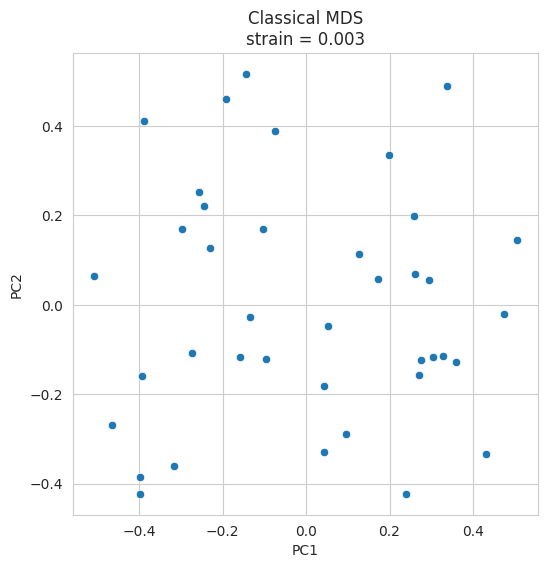

In [43]:
#@title Визуализируем результат

Z_mds = eigenvectors[:,:2] @ np.diag(np.sqrt(eigenvalues[:2]))
strain = np.sum(np.square(eigenvalues[2:]))

plt.figure(figsize=(6, 6))

fig = sns.scatterplot(x=Z_mds[:, 0], y=-Z_mds[:, 1])
fig.set_title(f"Classical MDS\nstrain = {strain:.3f}")
fig.set_xlabel("PC1")
fig.set_ylabel("PC2")
plt.show()

In [44]:
#@title Разность матриц расстояний

dist_matrix(Z, euclidean) - dist_matrix(pd.DataFrame(Z_mds), euclidean)

array([[0.  , 0.01, 0.01, ..., 0.02, 0.01, 0.  ],
       [0.01, 0.  , 0.01, ..., 0.  , 0.01, 0.01],
       [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.02],
       [0.01, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.02, 0.  , 0.  ]])

In [45]:
#@title Норма Фробениуса разности матриц расстояний

np.linalg.norm(dist_matrix(Z, euclidean) - dist_matrix(pd.DataFrame(Z_mds), euclidean), 'fro')

np.float64(0.3746998799039039)

Таким образом, с операцией отзеркаливания относительно вертикальной оси, получаем аналогичный результат и при помощи спектрального разложения матрицы $ZZ^T$

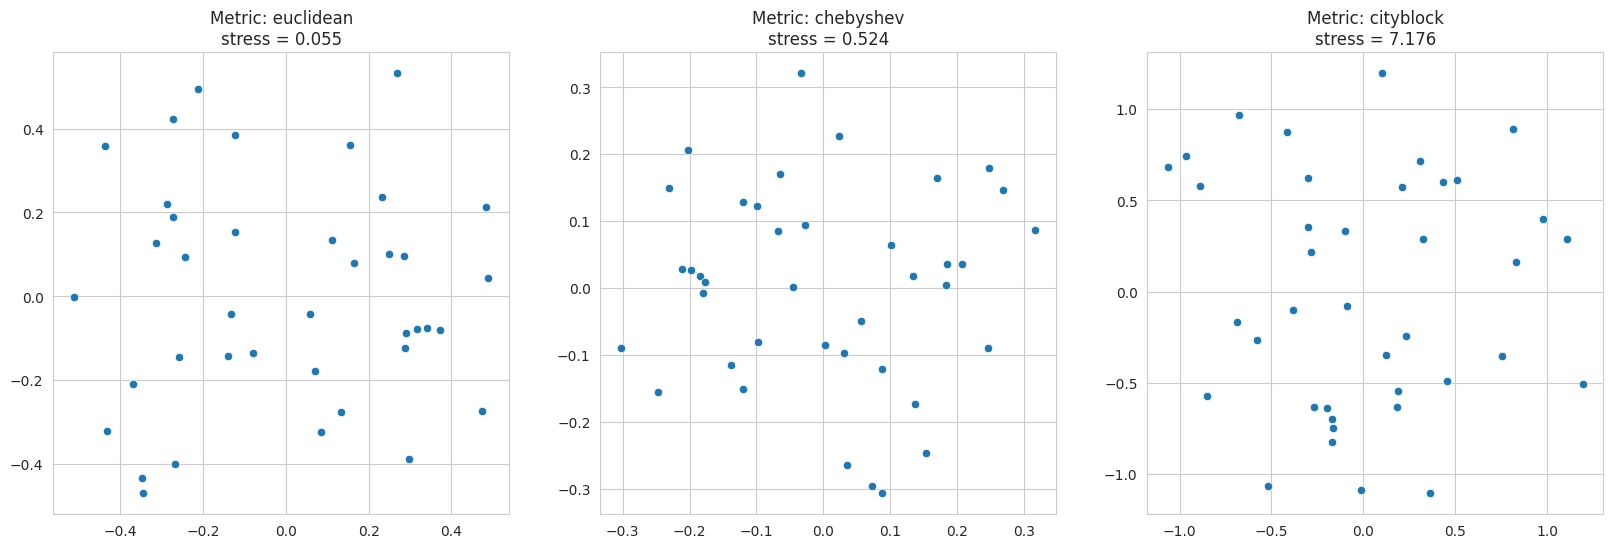

In [46]:
#@title Сравнение результатов с использованием разных метрик

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

mds = MDS(n_components=2, dissimilarity='precomputed')
Z_mds = mds.fit_transform(dist_matrix(Z, euclidean))

sns.scatterplot(x=Z_mds[:, 0], y=Z_mds[:, 1], ax=axes[0])
axes[0].set_title(f'Metric: euclidean\nstress = {mds.stress_:.3f}')

Z_mds = mds.fit_transform(dist_matrix(Z, chebyshev))

sns.scatterplot(x=Z_mds[:, 0], y=Z_mds[:, 1], ax=axes[1])
axes[1].set_title(f'Metric: chebyshev\nstress = {mds.stress_:.3f}')

Z_mds = mds.fit_transform(dist_matrix(Z, cityblock))

sns.scatterplot(x=Z_mds[:, 0], y=Z_mds[:, 1], ax=axes[2])
axes[2].set_title(f'Metric: cityblock\nstress = {mds.stress_:.3f}')

plt.show()

> **Вывод**: евклидова метрика показывает себя лучше всего, возвращая наименьший показатель `stress_`

## Бонус. Понижение размерности (t-SNE)

Рассмотрим еще один алгоритм понижения размерности: `TSNE`.

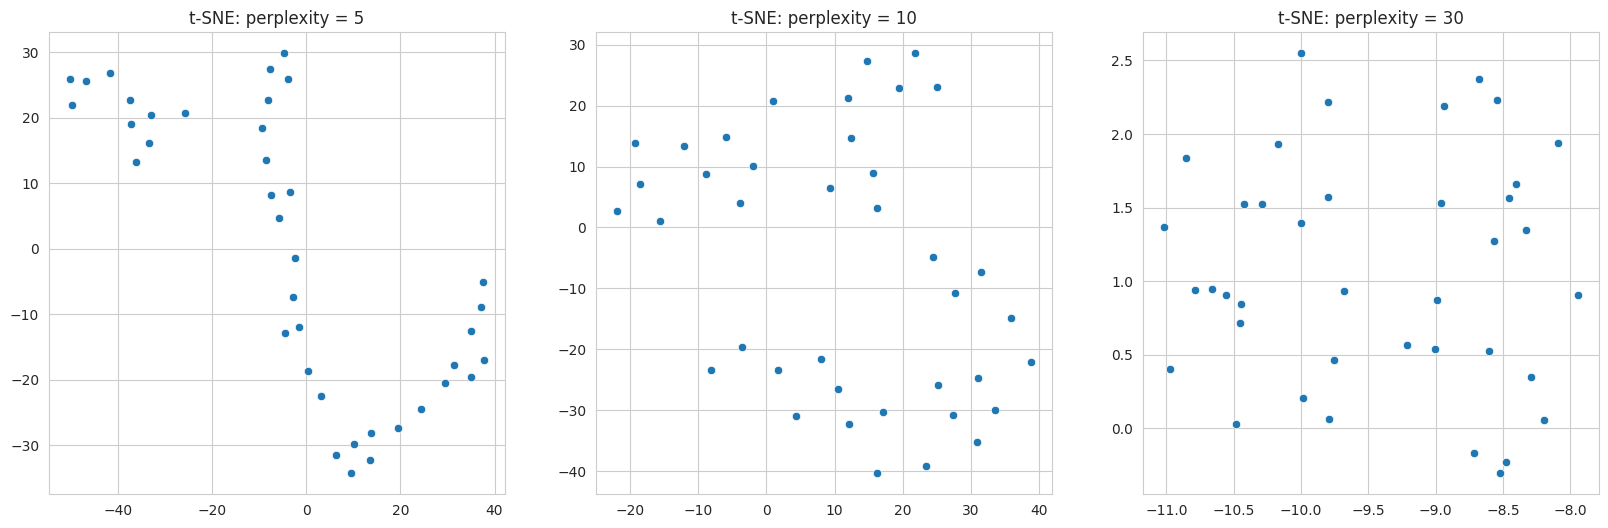

In [47]:
#@title Сравнение результатов работы t-SNE при различных значениях perplexity

from sklearn.manifold import TSNE

perplexity = [5, 10, 30]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i in range(3):
    Z_tsne = TSNE(n_components=2, perplexity=perplexity[i]).fit_transform(Z)

    sns.scatterplot(x=Z_tsne[:, 0], y=Z_tsne[:, 1], ax=axes[i])
    axes[i].set_title(f't-SNE: perplexity = {perplexity[i]}')

plt.show()

> **Вывод**: чем меньше значение `perplexity`, тем новые данные более группированные.

Попытаемся интерпретировать полученные группировки (кластеры). Рассмотрим небольшой кластер в левом верхнем углу, получающийся при значении `perplexity=5`:

In [48]:
#@title Индексы объектов со значением PC1 (новый признак) меньше -20

Z_tsne = TSNE(n_components=2, perplexity=5).fit_transform(Z)
tmp = pd.DataFrame(Z_tsne)

tmp[tmp[0] < -20].index.tolist()

[0, 2, 4, 16, 17, 22, 23, 35, 36, 38]

In [49]:
#@title Делим объекты выборки по принадлежности небольшому кластеру

Z['labels'] = 'not in cluster'

ind = Z.iloc[tmp[tmp[0] < -20].index.tolist()].index.tolist()

Z.loc[ind, 'labels'] = 'in cluster'

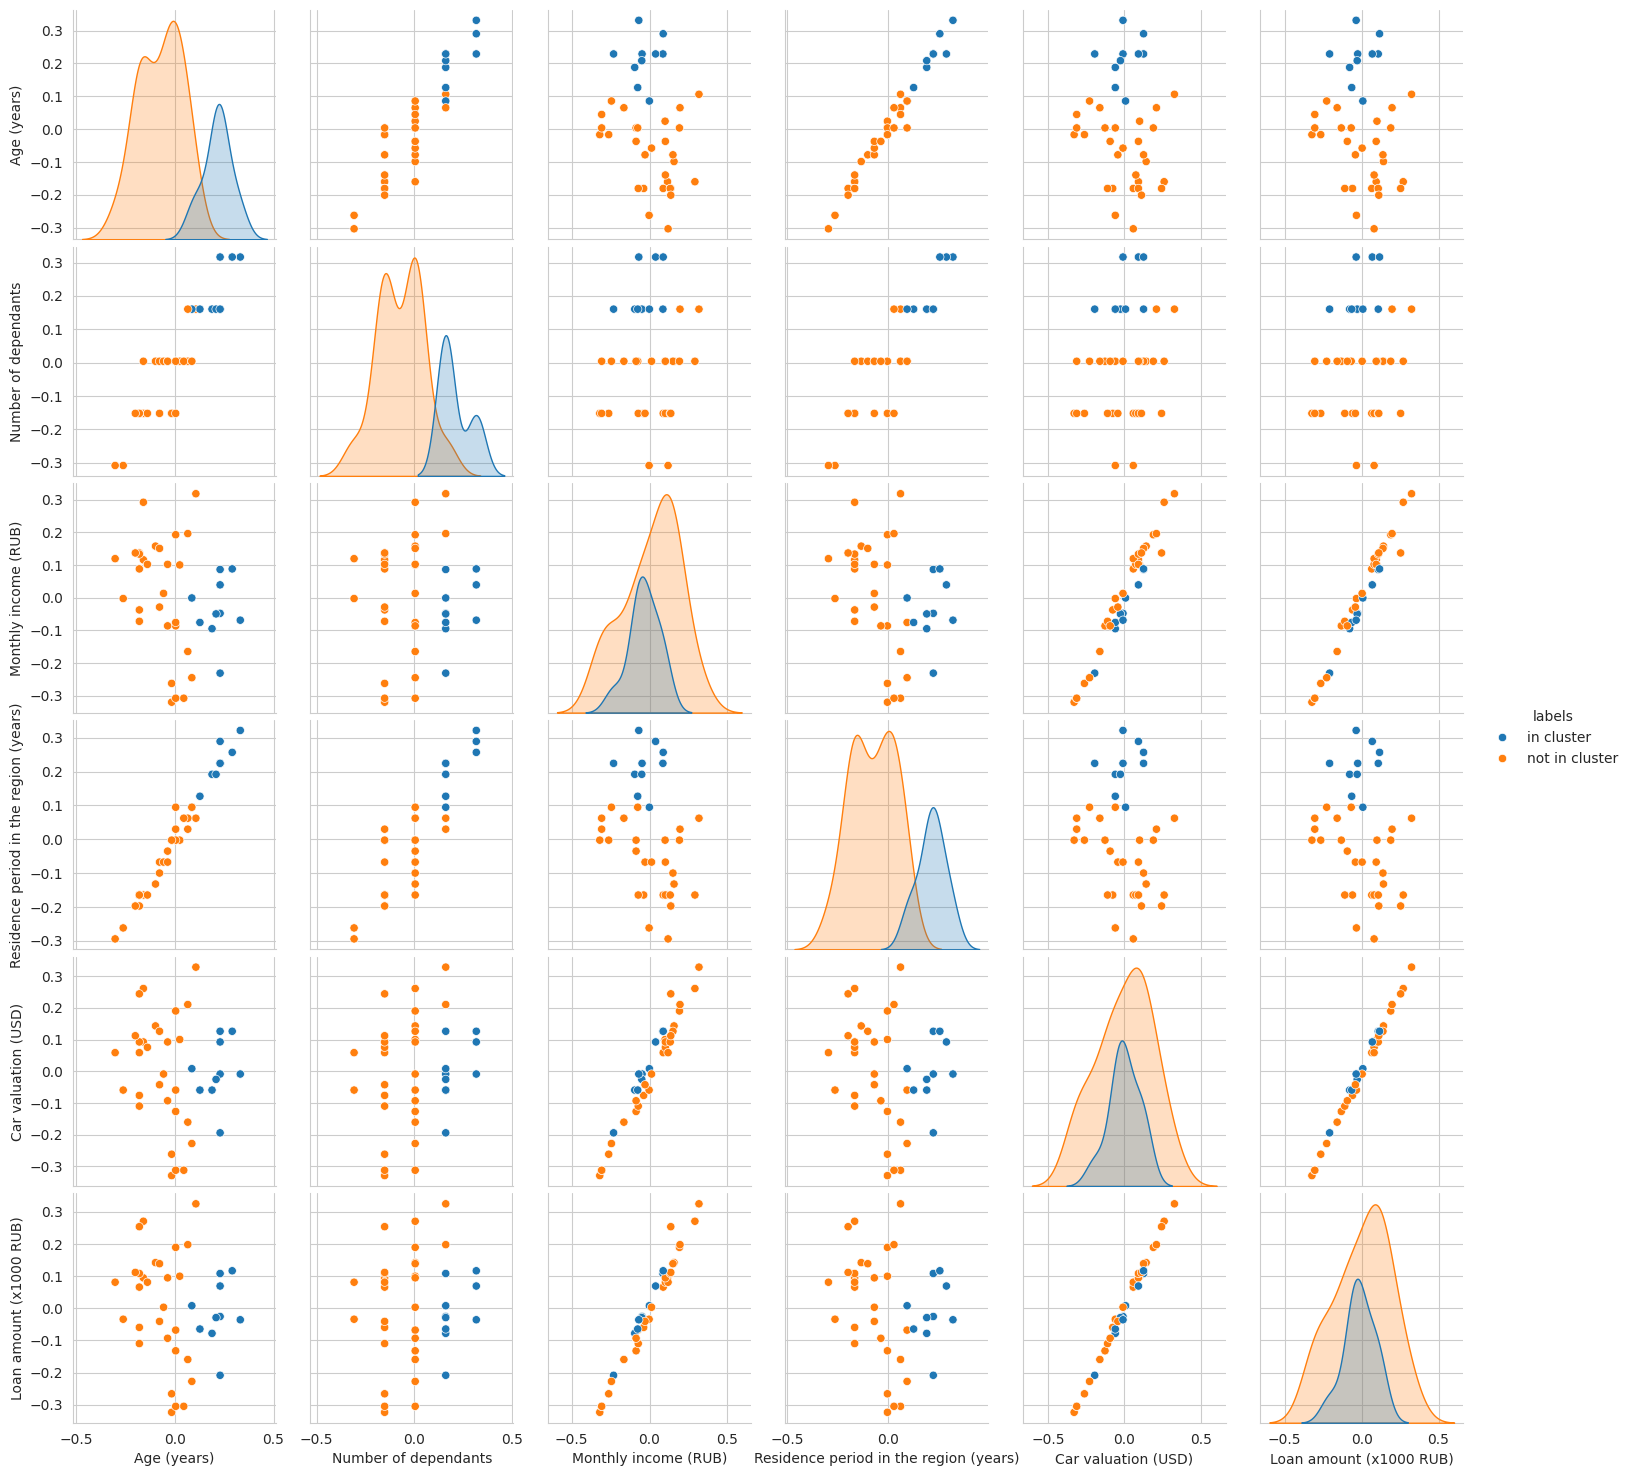

In [50]:
#@title Отображаем полученные результаты

sns.pairplot(Z, hue='labels')
plt.show()

> **Вывод**: графики выше показывают, что значение первого нового признака коррелируется со значениями исходных признаков "Возраст", "Число иждивенцев" и "Число лет проживания в регионе".

/tmp/ipython-input-790365372.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_matrix = pd.concat([corr_matrix, row])


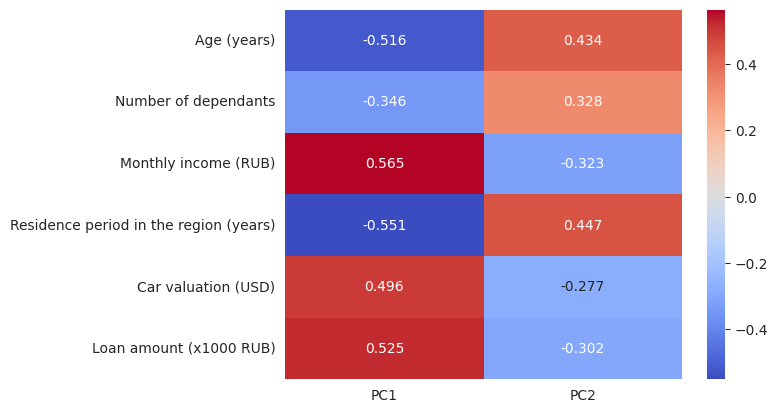

In [51]:
#@title Корреляционная матрица исходных признаков с новыми

Z = Z.drop(columns=['labels'])
Z_tsne = pd.DataFrame(Z_tsne, columns=['PC1', 'PC2'])

corr_matrix = pd.DataFrame(columns=Z_tsne.columns)

for x in Z.columns:
    row = pd.DataFrame(index=[x], columns=Z_tsne.columns)
    for y in Z_tsne.columns:
        row[y] = Z[x].corr(Z_tsne[y])
    corr_matrix = pd.concat([corr_matrix, row])

fig = sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()